<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0531/0531_06_%EB%AC%B8%EC%84%9C%EC%9A%94%EC%95%BD_summa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install summa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54389 sha256=38315303e8bfad757059394dbebeddcffd1cd2ce051bec88110be7630d358771
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [2]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122545 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [3]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)


NanumGothic Eco


# 뉴스 전처리

데이터 설명
- AI Hub에서 제공하는 문서요약텍스트 데이터 중 신문기사 train_original.json파일을 사용합니다. 
- https://aihub.or.kr/aidata/8054
- AI가 텍스트를 이해하고 핵심내용을 자동으로 요약하는 기술개발을 위한 텍스트 및 요약내용을 생성하는 텍스트 데이터로, 그 중에서 신문기사 원문데이터를 사용하여 문서요약과 토픽모델링을 진행하겠습니다. 
  - media: 미디어 명
  - id : 문서 번호
  - article_original : 신문기사
  - abstractive : AI hub에서 제공하는 생성 요약문
  - extractive : 추출요약문, 원문의 형태적 구조를 바탕으로 내용을 잘 표현하는 문장 3개를 우선순위에 따라 차례로 작성


In [ ]:
# from google.colab import files
# data = files.upload()

In [4]:
!pip install -U --no-cache-dir gdown --pre
!gdown --no-cookies --id 1KuBG40WNpVPV1ilfGaiCI2D3l8JVSfbS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1KuBG40WNpVPV1ilfGaiCI2D3l8JVSfbS
From (redirected): https://drive.google.com/uc?id=1KuBG40WNpVPV1ilfGaiCI2D3l8JVSfbS&confirm=t&uuid=cc00df10-9171-40b8-bfea-0e09c9f05b40
To: /content/train_original.json
100% 800M/800M [00:11<00:00, 68.2MB/s]


In [5]:
import pandas as pd

df_news = pd.read_json("./train_original.json")
df_news

#article_original : 원문
#abstractive : 사람이 만든 문장(생성 요약문)
#extractive : 사람이 뽑은 중요도

,media,id,article_original,abstractive,extractive
0,부산일보,360972161,[지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작...,통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계...,"[4, 11, 18]"
1,중도일보,356659913,[서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 ...,서산시 가충순 의원과 이수의 의원이 활발한 의정활동을 펼친 감사의 표시로 한국지역신...,"[1, 3, 4]"
2,무등일보,351718460,[지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대...,‘조선대의 새로운 비상을 꿈꾸다’를 슬로건으로 진행되어 단체생활을 통해 협동심과 ...,"[0, 2, 4]"
3,이데일리,335868123,[서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 ...,서울시가 다음달 4일부터 서울 시내 319개 고등학교 3학년 8만4700명을 대상으...,"[0, 1, 2]"
4,서울신문,351443347,[미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민...,미국인 선교사가 우간다에서 의사 행세를 하며 두 아이의 죽음과 관련돼 있다며 지역 ...,"[0, 1, 2]"
...,...,...,...,...,...
260692,매일경제,353316985,"[두통과 어지럼증은 우리에게 매우 익숙하다., 하루 이틀 정도만 참으면 자연스럽게 ...","두통과 어지럼증은 우리에게 매우 익숙한 증상이며, 이 두통은 크게 긴장성 두통, 혈...","[3, 12, 16]"
260693,부산일보,360784906,[파주 최대 테마파크 퍼스트가든이 ㈜투바앤의 캐릭터 '라바'와 할로윈 페스티벌(사진...,파주 최대 테마파크 퍼스트가든이 오는 10월 12일부터 31일까지 가족들이 함께 즐...,"[0, 4, 1]"
260694,부산일보,357253753,[민원과 난공사로 완공이 늦어지고 있는 양산시 한일아파트 인근 옹벽 보수·보강공사 ...,양산시는 지난해 10월부터 43억 원을 들여 진행 중인 한일아파트 뒤편 옹벽 보수·...,"[4, 6, 7]"
260695,매일신문,347655953,"[사단법인 전국자원봉사연맹이 호국보훈의 달을 맞이하여, 오는 2019년 6월 23일...","국가를 위해 헌신한 분들의 숭고한 희생을 기리고, 유가족 들을 위로하기 위해 열리는...","[0, 1, 2]"


In [6]:
# 원문기사 
df_news['article_original'].iloc[0]

['지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성 이후 가장 많았다.',
 '폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계, 두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다.',
 '‘연령표준화 사망률’(표준인구 10만 명당 사망자 수)은 울산·충북·부산 순으로 높게 나타났다.',
 '■작년 사망자 29만 8820명, 역대 최다',
 "24일 통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다.",
 '통계청은 인구 구조의 고령화와 지난해 1~2월 유례가 드문 한파 등을 그 원인으로 꼽았다.',
 '지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다.',
 '특히 80세 이상의 사망자가 전체 사망자의 절반에 가까운 46.3%로, 10년 전보다 14.3%포인트(P)나 증가했다.',
 '■폐렴·알츠하이머병 사망률 순위 ‘껑충’',
 '사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다.',
 '1983년 관련 통계를 집계한 이래 줄곧 암이 사망원인 1위로 집계됐다.',
 '특히 폐렴(4위→3위)과 치매의 일종인 알츠하이머병(11위→9위)에 의한 사망률 순위 상승이 두드러졌다.',
 '폐렴 사망률은 2004년 10위에서 꾸준히 순위가 상승하고 있고, 알츠하이머병 사망률 역시 통계 작성 이래 10대 사인에 처음 포함됐다.',
 '지난해 알츠하이머병에 의한 사망률은 12.0명으로 전년(9.8명) 대비 22.5% 증가했다.',
 '알츠하이머병 사망률은 10년 전(3.8명)과 비교하면 무려 214.2% 증가했다.',
 '폐렴 사망률은 45.4명으로 전년(

In [7]:
# 생성 요약문(AI hub)
df_news['abstractive'].iloc[0]

"통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계를 작성한 이래 가장 많았으며 사망 원인 중 폐렴과 알츠하이머 병의 순위 상승이 두드러졌고 자살에 의한 사망자도 증가했다. "

In [8]:
# 주요 문장 추출 결과(AI hub)
for i in df_news['extractive'].iloc[0]:
  print(df_news['article_original'].iloc[0][i])

24일 통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다.
특히 폐렴(4위→3위)과 치매의 일종인 알츠하이머병(11위→9위)에 의한 사망률 순위 상승이 두드러졌다.
지난해 자살에 의한 사망자는 1만 3670명으로 전년보다 9.7%(1207명) 증가했다.


In [9]:
# 데이터 타입과 null 값 확인
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260697 entries, 0 to 260696
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   media             260697 non-null  object
 1   id                260697 non-null  int64 
 2   article_original  260697 non-null  object
 3   abstractive       260697 non-null  object
 4   extractive        260697 non-null  object
dtypes: int64(1), object(4)
memory usage: 9.9+ MB


# 문서 요약: 키워드 추출 및 핵심 문장 선택

뉴스 기사에서 중요한 단어 혹은 문장을 추출하여 요약할 수 있습니다. 

왜 문서 요약이 필요할까요? 이유는 다음과 같습니다.    
1. 많은 양의 데이터를 처리 가능 
2. 일관된 추출
3. 실시간 분석 가능

문서 요약의 두 가지 기법 
1. extractive approach: 문서 내 키워드나 문장을 추출해서 요약을 하는 방식
2. abstractive approach: 문서 내 포함된 단어 외에 새로운 단어나 문장을 사용해서 요약하는 방식

## Text rank를 활용한 키워드 추출
- Bringing Oder into Texts 논문 기반 (https://www.aclweb.org/anthology/W04-3252.pdf)

- 키워드 추출이란?   
키워드 추출은 문서를 잘 설명하는 단어를 텍스트에서 식별하는 것입니다. 

- Text rank를 활용한 키워드 추출
  -  그래프 기반 랭킹 모델 
  -  키워드와 문장 추출을 위한 비지도 학습 방법을 제안

- 그래프 기반 랭킹 알고리즘이란? 
  - 그래프 기반 랭킹 알고리즘은 구글 page rank에서 사용된 유명한 알고리즘으로, 특히 웹분석에 성공적으로 적용하였습니다. 
  - 기본적으로 그래프 기반 랭킹 알고리즘은 그래프의 각 노드의 중요도를 결정하는 방법입니다. 
  - 각 단위(웹페이지 or 단어)의 중요도를 해당 단위가 연결되어 있는 다른 단위의 중요도를 바탕으로 평가합니다. 
  - Text rank는 그래프 기반 랭킹 알고리즘으로 단어 노드의 중요도를 결정하는 방법입니다. 
  - 단순히 문서 내 빈도수로 단어의 중요도를 판단하는 것 보다 좋은 성능을 보이는 것으로 알려져있습니다. 
    - 그래프 기반 랭킹 알고리즘은 텍스트 단위의 로컬 텍스트 뿐만 아니라, 전체 텍스트에서 재귀적으로 정보를 고려하며, 
    - 깊은 언어지식이나, 도메인 별 corpora 없이, 다른 도메인, 장르, 언어에 적용 가능합니다. 
    

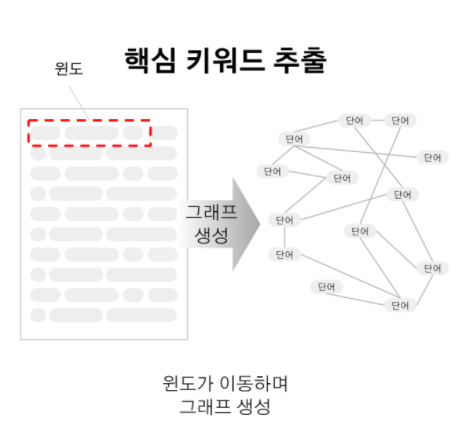

Text Rank 평가
- 정밀도(Precision)과 F-measure에서 가장 높으며
- 재현율(Recall)은 지도학습에 비해 높지 않습니다. 
- Window가 클수록 정확도가 낮아집니다. 
  - 즉, 멀리 떨어져 있는 단어가 관계를 정의할 만큼 강력하지 않습니다. 

다시 말해, 
- 정밀도가 높다 => 추출한 단어가 핵심단어일 확률이 높다
- 재현율이 낮다 => 지도학습에 비하여 핵심 키워드가 추출될 확률이 낮다   
고 말할 수 있습니다

In [10]:
# 뉴스 데이터 프레임에서 본문 하나를 가져옵니다. 
doc = ' '.join(df_news['article_original'].iloc[0])
doc

'지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성 이후 가장 많았다. 폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계, 두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다. ‘연령표준화 사망률’(표준인구 10만 명당 사망자 수)은 울산·충북·부산 순으로 높게 나타났다. ■작년 사망자 29만 8820명, 역대 최다 24일 통계청이 발표한 \'2018년 사망원인통계\'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다. 통계청은 인구 구조의 고령화와 지난해 1~2월 유례가 드문 한파 등을 그 원인으로 꼽았다. 지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다. 특히 80세 이상의 사망자가 전체 사망자의 절반에 가까운 46.3%로, 10년 전보다 14.3%포인트(P)나 증가했다. ■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다. 1983년 관련 통계를 집계한 이래 줄곧 암이 사망원인 1위로 집계됐다. 특히 폐렴(4위→3위)과 치매의 일종인 알츠하이머병(11위→9위)에 의한 사망률 순위 상승이 두드러졌다. 폐렴 사망률은 2004년 10위에서 꾸준히 순위가 상승하고 있고, 알츠하이머병 사망률 역시 통계 작성 이래 10대 사인에 처음 포함됐다. 지난해 알츠하이머병에 의한 사망률은 12.0명으로 전년(9.8명) 대비 22.5% 증가했다. 알츠하이머병 사망률은 10년 전(3.8명)과 비교하면 무려 214.2% 증가했다. 폐렴 사망률은 45.4명으로 전년(37.8명) 대비 20.0% 증가했다. 알코올 관련 사망률은 9.6명으로 전년보다 2.0% 늘었다. ■자살

In [13]:
from summa import keywords

keywords.keywords(doc)
#print(keywords.keywords(doc, words = 5))

'명\n년\n지난해\n증가했다\n만\n사망자\n사망률\n보면\n알츠하이머병\n의한 사망률이\n사망원인 순위\n명으로 관련\n한파 등\n인구\n유명인 자살이 영향을\n폐렴\n사망률은\n위를\n위로 전년보다\n이래\n울산\n연령표준화\n단계\n이후\n연속\n늘었다 특히\n질환은\n베르테르\n수\n역시'

In [ ]:
keywords.keywords?

In [11]:
from summa import keywords # keywords : 영어만 지원
print(keywords.keywords(doc, words = 5))
#  words = : 몇 단어를 추출할 것인가

명
년
지난해
증가했다
만


In [ ]:
# 5개의 키워드 추출 
print(keywords.keywords(doc, words=5).split('\n'))

['명', '년', '지난해', '증가했다', '만']


In [ ]:
# 상위 10% 키워드 추출 
print(keywords.keywords(doc, ratio=0.1).split('\n'))
# ratio= 상위 % 추출, 10% = 0.1

['명', '년', '지난해', '증가했다', '만', '사망자', '사망률', '의한', '보면', '명으로', '등', '자살이', '알츠하이머병', '사망원인 순위', '전년보다', '인구', '폐렴', '사망률은']


In [ ]:
# 5개의 키워드와 각 단어의 중요도 출력
print(keywords.keywords(doc, words=10, scores=True))
# scores=True : 수치 확인하려면 True

[('명', 0.45493492498930727), ('년', 0.3363613437005727), ('지난해', 0.22364376067019298), ('증가했다', 0.14770716913355134), ('만', 0.13634980134833266), ('사망자', 0.13380506392544228), ('사망률', 0.1285497030598473), ('의한', 0.12717281046486362), ('보면', 0.12087663078120903), ('명으로', 0.11400672288497654)]


## Text rank를 활용한  문서요약

- 문서요약이란?   
문서 요약은 문서에서 중요한 문장을 자동으로 추출하는 과정입니다.   

- Text rank를 활용한 문서요약  
문장의 중요성을 그래프 기반 랭킹모델로 판단하는 모델입니다. 

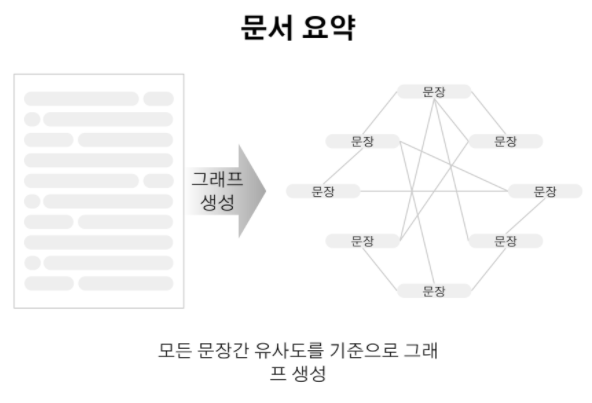

In [ ]:
from summa.summarizer import summarize # summarize: 요약함수

summarize(doc).split('\n')
# 있는 문장 그대로 가져온다, taxt rank에서 상위에 랭크된 문장들을 가져온 것, fitting 없이 바로 출력된다(라이브러리 내 알고리즘이 있음)

["■작년 사망자 29만 8820명, 역대 최다 24일 통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다.",
 '지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다.',
 '■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다.',
 '■자살률 5년 만에 증가…"베르테르 효과 영향" 지난해 자살에 의한 사망자는 1만 3670명으로 전년보다 9.7%(1207명) 증가했다.']

In [ ]:
# 중요도 상위 10% 문장
summarize(doc, ratio = 0.1)
# 상위 : ratio = 

'지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다.\n■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다.'

In [ ]:
# 단어 개수로 설정
summarize(doc, words = 20)
# 단어 개수 : words =

'지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다.'

In [ ]:
# 단어 개수로 설정
summarize(doc, words = 50)

'지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다.\n■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다.\n■자살률 5년 만에 증가…"베르테르 효과 영향" 지난해 자살에 의한 사망자는 1만 3670명으로 전년보다 9.7%(1207명) 증가했다.'

In [ ]:
# AIHub에서 생성한 요약문과 비교하여 보면, 
print('AI Hub에서 제공하는 사람이 생성한 요약문 :\n',df_news['abstractive'].iloc[0])
print('\n-------------\n')
print('텍스트 랭크 모델을 사용한 요약문 :\n',summarize(doc, words = 50))

AI Hub에서 제공하는 사람이 생성한 요약문 :
 통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계를 작성한 이래 가장 많았으며 사망 원인 중 폐렴과 알츠하이머 병의 순위 상승이 두드러졌고 자살에 의한 사망자도 증가했다. 

-------------

텍스트 랭크 모델을 사용한 요약문 :
 지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다.
■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다.
■자살률 5년 만에 증가…"베르테르 효과 영향" 지난해 자살에 의한 사망자는 1만 3670명으로 전년보다 9.7%(1207명) 증가했다.


핵심 정보인 
- 사망 원인 중 폐렴과 알츠하이머 병의 순위상승
- 자살로 인한 사망자 증가
가 두 요약문 모두에 포함되어 있는 것을 확인할 수 있다